#### Basics of a PID controller implementation

In [1]:
import matplotlib.pyplot as plt

In [2]:
# INITIAL SETUP
setpoint = 2.0
actual_value = 0.0
dt = 0.1

# PID Gains (Tunable Parameters)
kp = 1.0
ki = 0.1
kd = 0.5

# Variables needed to track history
previous_error = 0.0
integral_sum = 0.0

# Lists to store data for plotting!
time_list = []
actual_value_list = []
pid_output_list = []
setpoint_list = []

# Simulation Parameters
runtime_steps = 200 # Run for a longer time (10 seconds simulated)

# SIMULATION LOOP 
for step in range(runtime_steps):
    
    # Calculate current error
    error = setpoint - actual_value
    
    # --- P I D CALCULATIONS ---
    P = kp * error
    integral_sum += error * dt
    I = ki * integral_sum
    
    if step == 0:
        D = 0.0
    else:
        D = kd * (error - previous_error) / dt
    
    PID_output = P + I + D
    
    # SYSTEM SIMULATION
    actual_value = actual_value + (PID_output * dt)
    
    # STORE DATA FOR PLOTTING
    time_list.append(step * dt)
    actual_value_list.append(actual_value)
    pid_output_list.append(PID_output)
    setpoint_list.append(setpoint) # Keep track of the target line
    
    # PREPARE FOR NEXT STEP ---
    previous_error = error

What to Look For in the Plot

The plots will show you two critical things:

    Response Curve (Top Plot):

        Does the blue line (Actual Value) reach the red dashed line (Setpoint)?

        Does it overshoot (go past the setpoint before settling)? If your kp or kd is too high, it might.

        How quickly does it settle? (This is related to the rise time and settling time.)

    Control Signal (Bottom Plot):

        The PID Output (green line) shows the control effort. Notice how it starts high (due to the large initial error), quickly drops to zero as the actual value approaches the setpoint, and then settles near zero when the control is successful.

Now you have a fully visual way to tune your kp,ki, and kd values!

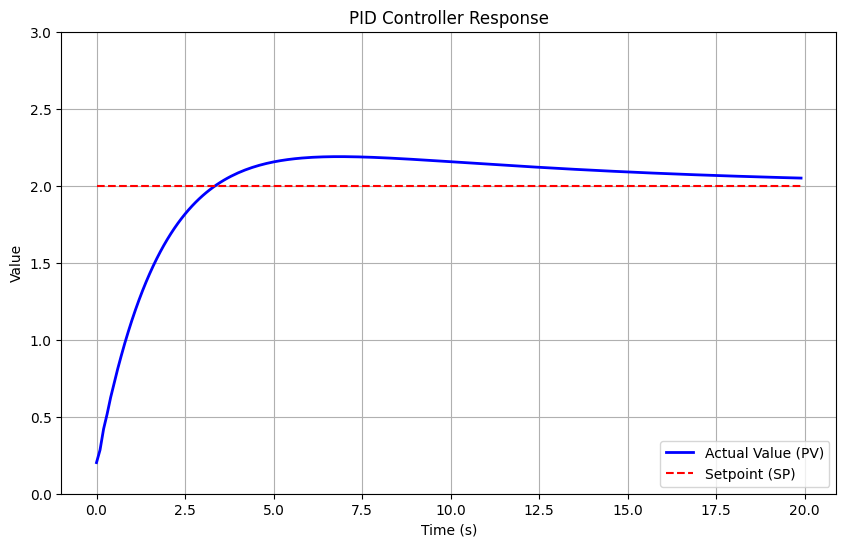

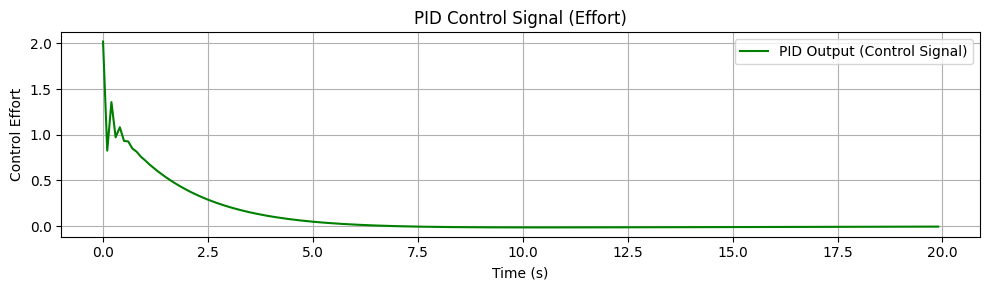

In [3]:
# PLOT THE RESULTS ---
plt.figure(figsize=(10, 6))

# Plot the Actual Value (PV) and Setpoint
plt.plot(time_list, actual_value_list, label='Actual Value (PV)', color='blue', linewidth=2)
plt.plot(time_list, setpoint_list, label='Setpoint (SP)', color='red', linestyle='--')
plt.title('PID Controller Response')
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.grid(True)
plt.legend(loc='lower right')
plt.ylim(0, setpoint * 1.5) # Set y-axis limit for better visualization

# Plot the Control Signal (PID Output) separately
plt.figure(figsize=(10, 3))
plt.plot(time_list, pid_output_list, label='PID Output (Control Signal)', color='green')
plt.title('PID Control Signal (Effort)')
plt.xlabel('Time (s)')
plt.ylabel('Control Effort')
plt.grid(True)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()